# Upgrading anaconda

In [1]:
# Upgrading anaconda
conda upgrade conda


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/win-64'




In [2]:
# Installing pip
conda install pip


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/win-64'




In [3]:
#Installing tensorflow
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Preprocessing

In [1]:
#Importing Keras
from tensorflow import keras 
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Preprocessing
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report

In [8]:
#Importing VGG16 architecture
from tensorflow.keras.applications.vgg16 import VGG16

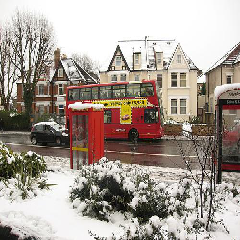

In [10]:
# Displaying image from the dataset
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path = 'C:/Users/Vimal/Desktop/saumya/Weather4Class/train/snow/399562505.jpg'
img = image.load_img(img_path,color_mode='rgb', target_size=(240, 240))
display(img)

# Defining train and test datagenerator using data augmentation

In [13]:
#Defining train and test datagenerator using data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255.,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    rotation_range= 20,
    width_shift_range= 0.2,
    height_shift_range= 0.2)

test_datagen = ImageDataGenerator( rescale = 1.0/255., 
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    rotation_range= 20,
    width_shift_range= 0.2,
    height_shift_range= 0.2)

# Loading the dataset

In [14]:
# Loading the training set and resizing the images to 240*240
train_generator = train_datagen.flow_from_directory('C:/Users/Vimal/Desktop/saumya/Weather4Class/train', batch_size = 32, class_mode='categorical', target_size=(240,240))

Found 4737 images belonging to 4 classes.


In [15]:
# Loading the validation set and resizing the images to 240*240
validation_generator = test_datagen.flow_from_directory('C:/Users/Vimal/Desktop/saumya/Weather4Class/validation', batch_size = 8, class_mode='categorical', target_size=(240,240))

Found 947 images belonging to 4 classes.


In [16]:
# Number of classes in the training set
train_generator.class_indices

{'cloudy': 0, 'rain': 1, 'snow': 2, 'sunny': 3}

In [17]:
# Loading the tets set and resizing the images to 240*240
test_generator = test_datagen.flow_from_directory('C:/Users/Vimal/Desktop/saumya/Weather4Class/test', batch_size = 8, class_mode='categorical', target_size=(240,240))

Found 631 images belonging to 4 classes.


In [18]:
# Splitting the test set into X_test set and Y_test set and displaying the shape
X_test, Y_test = next(test_generator)
print(X_test.shape)
print(Y_test.shape)

(8, 240, 240, 3)
(8, 4)


# Defining and Compiling the model

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 240, 240, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 240, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 240, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 120, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 120, 120, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 120, 120, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 60, 60, 128)       0     

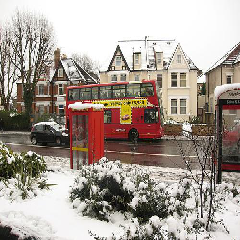

Found 4737 images belonging to 4 classes.
Found 947 images belonging to 4 classes.
Found 631 images belonging to 4 classes.
(8, 224, 224, 3)
(8, 4)
Epoch 1/10
100/100 [==============================] - 656s 7s/step - loss: 1.1911 - acc: 0.4850 - val_loss: 0.8614 - val_acc: 0.6558
Epoch 2/10
100/100 [==============================] - 2080s 21s/step - loss: 0.7892 - acc: 0.6794 - val_loss: 0.8191 - val_acc: 0.6737
Epoch 3/10
100/100 [==============================] - 669s 7s/step - loss: 0.6711 - acc: 0.7343 - val_loss: 0.9765 - val_acc: 0.5787
Epoch 4/10
100/100 [==============================] - 695s 7s/step - loss: 0.5715 - acc: 0.7750 - val_loss: 0.8021 - val_acc: 0.6663
Epoch 5/10
100/100 [==============================] - 699s 7s/step - loss: 0.4630 - acc: 0.8249 - val_loss: 0.7637 - val_acc: 0.6980
Epoch 6/10
100/100 [==============================] - 684s 7s/step - loss: 0.5162 - acc: 0.8088 - val_loss: 0.8338 - val_acc: 0.6927
Epoch 7/10
100/100 [==============================] 

In [6]:
#Importing VGG16 and defining the base model
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape = (240, 240, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False



# Displaying an image from the dataset
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np
img_path = 'C:/Users/Vimal/Desktop/saumya/Weather4Class/train/snow/399562505.jpg'
img = image.load_img(img_path,color_mode='rgb', target_size=(240, 240))
display(img)


#Defining train and test datagenerator using data augmentation

train_datagen = ImageDataGenerator(rescale = 1./255.,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    rotation_range= 20,
    width_shift_range= 0.2,
    height_shift_range= 0.2)

test_datagen = ImageDataGenerator( rescale = 1.0/255., 
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    rotation_range= 20,
    width_shift_range= 0.2,
    height_shift_range= 0.2)


# Loading the training set and resizing the images to 240*240
train_generator = train_datagen.flow_from_directory('C:/Users/Vimal/Desktop/saumya/Weather4Class/train', batch_size = 32, class_mode='categorical', target_size=(240,240))

# Loading the validation set and resizing the images to 240*240
validation_generator = test_datagen.flow_from_directory('C:/Users/Vimal/Desktop/saumya/Weather4Class/validation', batch_size = 8, class_mode='categorical', target_size=(240,240))


# Number of classes in the training set
train_generator.class_indices

# Loading the tets set and resizing the images to 240*240
test_generator = test_datagen.flow_from_directory('C:/Users/Vimal/Desktop/saumya/Weather4Class/test', batch_size = 8, class_mode='categorical', target_size=(240,240))


# Splitting the test set into X_test set and Y_test set and displaying the shape
X_test, Y_test = next(test_generator)
print(X_test.shape)
print(Y_test.shape)

# Defining the layers of the model
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 4096 hidden units and ReLU activation
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Add a final softmax layer for classification
x = layers.Dense(4, activation='softmax')(x)
model = tf.keras.models.Model(base_model.input, x)

# Compiling the model
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

# Saving the model with model.save function
model.save('C://Users//Vimal//Desktop//saumya//VGG16_model_sample.h5')


# Loading the saved model

In [21]:
# Loading the saved model using the models.load_model() function
add_model = tf.keras.models.load_model('C://Users//Vimal//Desktop//saumya//VGG16_model_sample.h5')

# Checking its architecture
add_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 240, 240, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 240, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 240, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 120, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 120, 120, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 120, 120, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 60, 60, 128)      

# Evaluation

In [23]:
# Evaluating the training accuracy and loss
(eval_loss, eval_accuracy) = add_model.evaluate(train_generator, batch_size= 32, verbose= 1)
print('Training Loss: ', eval_loss)
print('Traning Accuracy:', eval_accuracy)

149/149 [==============================] - 1201s 8s/step - loss: 0.2207 - acc: 0.9251
Training Loss:  0.22066602110862732
Traning Accuracy: 0.9250580668449402


# Plotting the graph for Training and Validation set

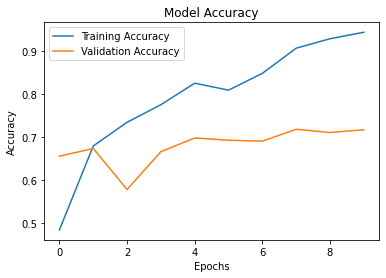

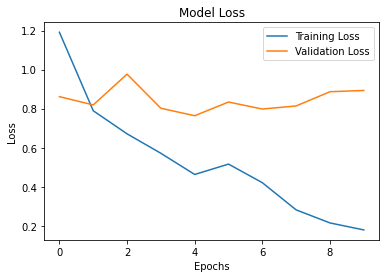

In [32]:
# Plotting the Model Accuracy for Training and Validation set
import matplotlib.pyplot as plt
plt.subplot()
plt.title('Model Accuracy')
plt.plot(vgghist.history['acc'])
plt.plot(vgghist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.savefig('baseline_acc_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 900)
plt.show()

# Plotting the Model Loss graph for Training and Validation set
plt.title('Model Loss')
plt.plot(vgghist.history['loss'])
plt.plot(vgghist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss','Validation Loss'])
plt.savefig('baseline_loss_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 900)
plt.show()

# Test Accuracy

In [33]:
# Evaluating the test generator accuracy
loss, acc = add_model.evaluate(test_generator, verbose=2, steps = test_generator.samples // 631)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1/1 - 0s - loss: 0.2517 - acc: 0.8750
Restored model, accuracy: 87.50%


In [34]:
#X_test, Y_test = next(test_generator) step
y_pred = add_model.predict(X_test)
print (y_pred.size)

32


In [35]:
# Defining predicted class
pred_class = []
for i in range(len(y_pred)):
    pred_class.append(np.argmax(y_pred[i]))

In [38]:
# Defining actual class
actual_class = []
for i in range(len(Y_test)):
    actual_class.append(np.argmax(Y_test[i]))

In [39]:
# Display of test accuraacy
print(' Test accuracy = ',accuracy_score(pred_class,actual_class))

 Test accuracy =  0.875


# Confusion Matrix

In [36]:
# Defining plot_confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

--------------------
| Confusion Matrix |
--------------------

 [[1 0 1]
 [0 3 0]
 [0 0 3]]


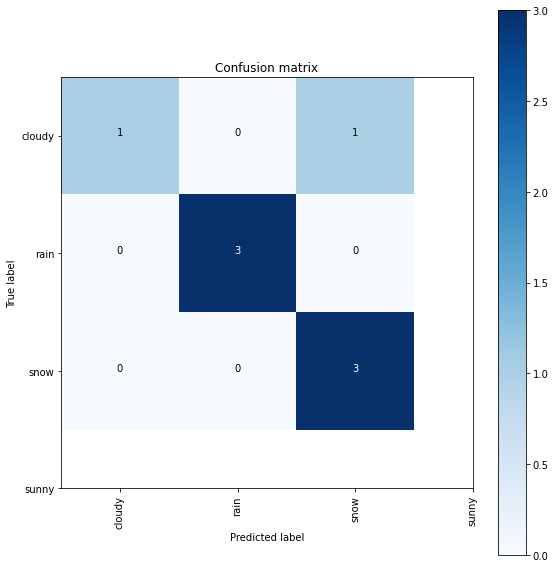

In [40]:
# Plotting confusin matrix

import itertools
cm = confusion_matrix(actual_class, pred_class)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        

plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['cloudy','rain','snow','sunny'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)

# Results

In [41]:
# Results

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Recall/TPR = {}".format(TPR))

# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity/TNR = {}".format(TNR))

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision/PPV = {}".format(PPV))

# Negative predictive value
NPV = TN/(TN+FN)
print("Negative Predict Value = {}".format(NPV))

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate = {}".format(FPR))

# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate = {}".format(FNR))

# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate = {}".format(FDR))

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall Accuracy = {}".format(ACC))

Recall/TPR = [0.5 1.  1. ]
Specificity/TNR = [1.  1.  0.8]
Precision/PPV = [1.   1.   0.75]
Negative Predict Value = [0.85714286 1.         1.        ]
False Positive Rate = [0.  0.  0.2]
False Negative Rate = [0.5 0.  0. ]
False discovery rate = [0.   0.   0.25]
Overall Accuracy = [0.875 1.    0.875]
